In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from steepestdescent import steepestdescent
from steepestdescent_line import steepestdescent_line
from newton import newton_md
from newton_line import newton_line_md
from BFGSmethod_line import BFGSmethod_line

In [ ]:
a = [[802, -400],[-400,200]]
eigenvalues, eigenvectors = np.linalg.eig(a)
eigenvalues, eigenvectors

(array([1.00160064e+03, 3.99360767e-01]),
 array([[ 0.89478425,  0.44649877],
        [-0.44649877,  0.89478425]]))

In [ ]:
def Myfun(x):
  def f(x):
      return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

  def df(x):
      return np.array([-400 * x[0] * (x[1]-x[0]**2) - 2*(1-x[0]), 200 * (x[1] - x[0]**2)])

  def d2f(x):
      return np.array([[ 1200 * x[0]**2 - 400 * x[1] + 2, -400 * x[0]], [-400 * x[0], 200]])

  f = f(x)
  df = df(x)
  d2f = d2f(x)

  return f, df, d2f

# 4. Contour plot



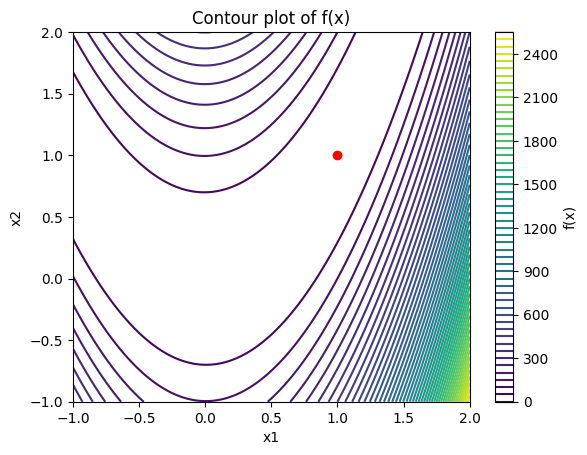

In [ ]:
x_min = [1,1]

x1 = np.linspace(-1, 2, 400)
x2 = np.linspace(-1, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate f(p1, p2) over the meshgrid
f = Myfun([X1,X2])[0]
# Create a contour plot
plt.contour(X1, X2, f, levels=50, cmap='viridis')
plt.colorbar(label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour plot of f(x)')

# Plot the minimizer at [1, 1]
plt.plot(x_min[0], x_min[1], 'ro')  # Minimizer at [1, 1]

plt.show()

#5. Contour plot of log(f(x))

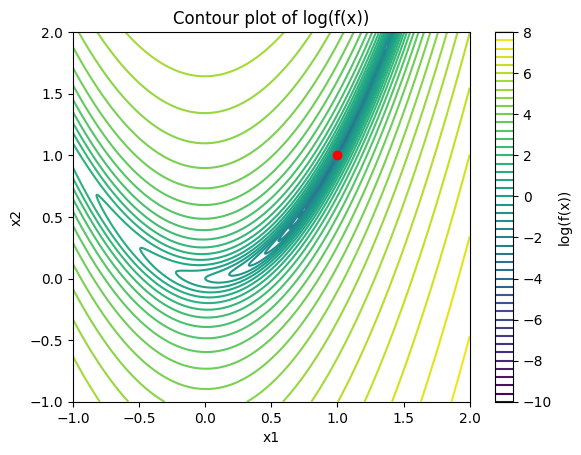

In [ ]:
f_log = np.log(Myfun([X1, X2])[0])
plt.contour(X1, X2, f_log, levels=50, cmap='viridis')
plt.colorbar(label='log(f(x))')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour plot of log(f(x))')

# Plot the minimizer at [1, 1]
plt.plot(x_min[0], x_min[1], 'ro')  # Minimizer at [1, 1]

plt.show()

#Regarding your observation about the minimizer not being on the curve: The minimizer should ideally lie at a contour where the contour lines are closest together,
#indicating a "bowl" shape or a local minimum. However, due to the discretization of the plot and the specific levels chosen for contour lines,
#the true minimum might not fall exactly on a contour line. It's generally close to the region where the contour lines are closest. So that. and With the log-plot we can observe certainly that [1,1] is the min.

# 7. Numerical methods


## 7a. Steepest descent method


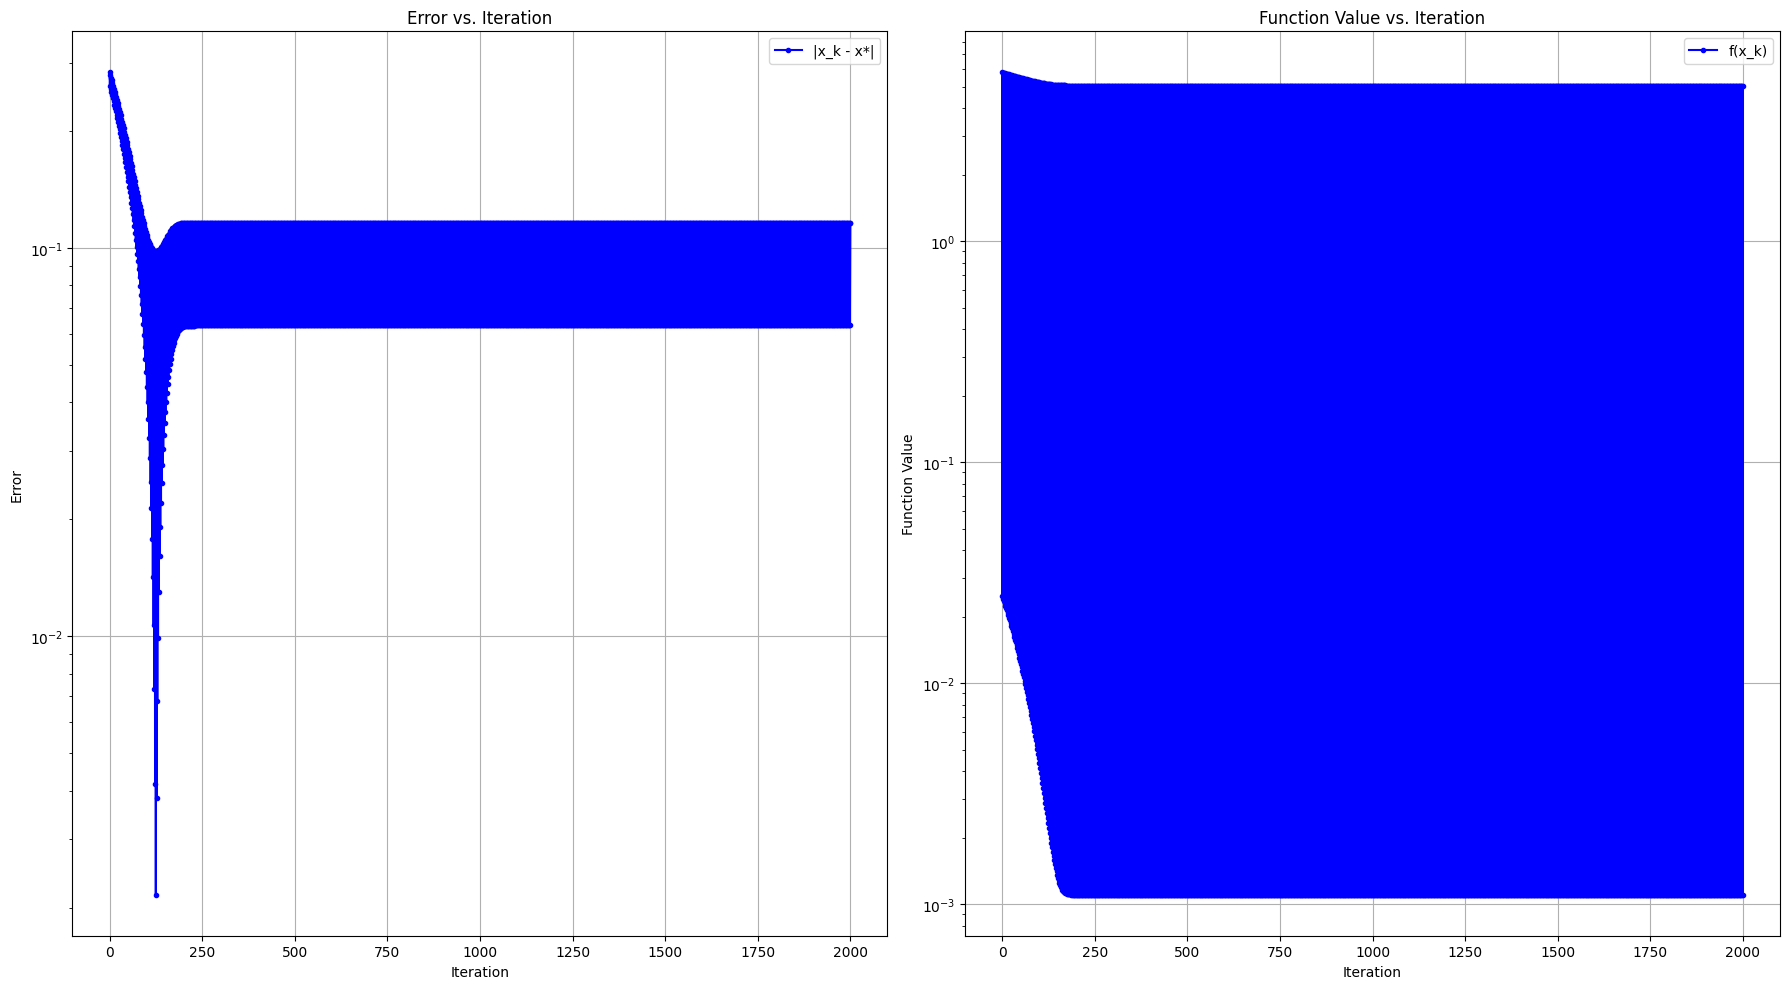

In [ ]:
# Example usage
x0 = [1.2, 1.2]  # Initial guess
alpha = 0.1  # Learning rate
maxit = 2000
stop_criteria = 1e-10
x_optimized_steepest1, stats_steepest1 = steepestdescent(alpha, Myfun, x0, tol=stop_criteria, maxit=maxit)

error_steepest1 = np.linalg.norm(x_min - np.array(stats_steepest1['X']), axis=1)

# Create a 2x1 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Plot error vs. iteration in the first subplot
axs[0].semilogy(error_steepest1, label='|x_k - x*|', color='blue', marker='.', linestyle='-')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error')
axs[0].set_title('Error vs. Iteration')
axs[0].legend()
axs[0].grid(True)

# Plot function value vs. iteration in the second subplot
axs[1].semilogy(stats_steepest1['F'], label='f(x_k)', color='blue', marker='.', linestyle='-')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Function Value')
axs[1].set_title('Function Value vs. Iteration')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

1 False [-0.13719583 -0.1994913 ] 1.6528743900262775
0.1 False [1.06128606 0.90147099] 0.11603424802292889
0.01 False [1.01784437 1.04678639] 0.05007381797812383
0.001 False [1.03195845 1.06621128] 0.07352057894668458


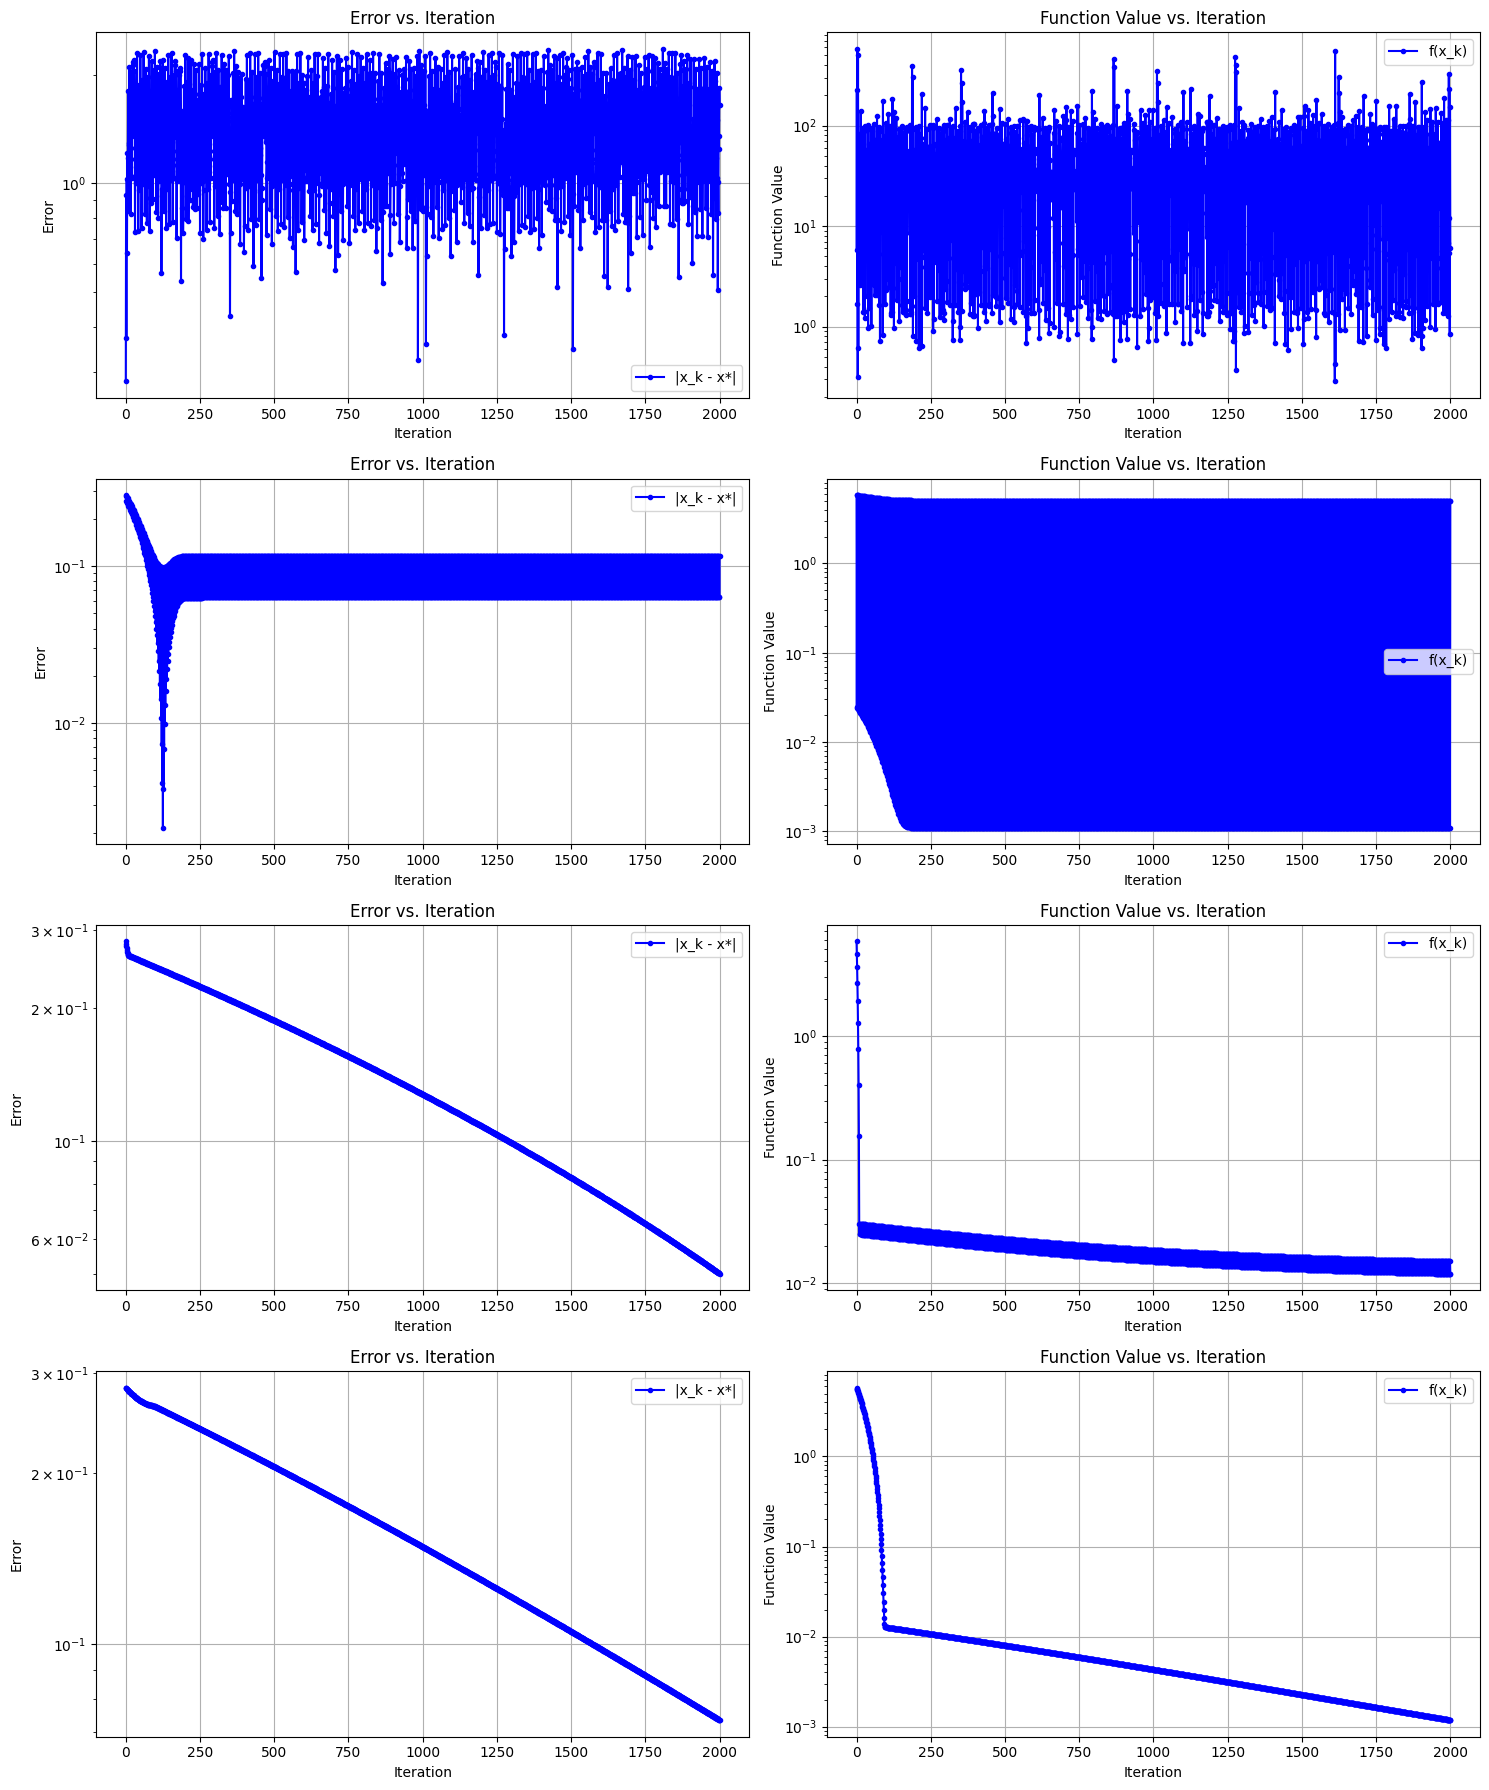

In [ ]:
# Define the alpha values to try
alpha_values = [1, 0.1, 0.01, 0.001]

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(15, 18))

# Iterate through each alpha value
for i, alpha in enumerate(alpha_values):
    # Perform optimization for the current alpha
    x_optimized_steepest1, stats_steepest1 = steepestdescent(alpha, Myfun, x0, maxit=maxit)

    # Calculate error and error norm
    error_steepest1 = np.linalg.norm(x_min - np.array(stats_steepest1['X']), axis=1)

    # Plot error vs. iteration
    axes[i, 0].semilogy(error_steepest1, label='|x_k - x*|', color='blue', marker='.', linestyle='-')
    axes[i, 0].set_xlabel('Iteration')
    axes[i, 0].set_ylabel('Error')
    axes[i, 0].set_title('Error vs. Iteration')
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Plot function value vs. iteration
    axes[i, 1].semilogy(stats_steepest1['F'], label='f(x_k)', color='blue', marker='.', linestyle='-')
    axes[i, 1].set_xlabel('Iteration')
    axes[i, 1].set_ylabel('Function Value')
    axes[i, 1].set_title('Function Value vs. Iteration')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

    print(alpha,stats_steepest1['converged'], stats_steepest1['X'][-1], error_steepest1[-1])

plt.tight_layout()
plt.show()

## For x0 = [-1.2, 1]

1 False [ 0.0766995  -0.94675966] 2.1546129532947975
0.1 False [0.46460448 0.28383735] 0.8941684998562269
0.01 False [0.95178881 0.89500724] 0.11553267397381523
0.001 False [0.25764214 0.0633668 ] 1.1951472517308839


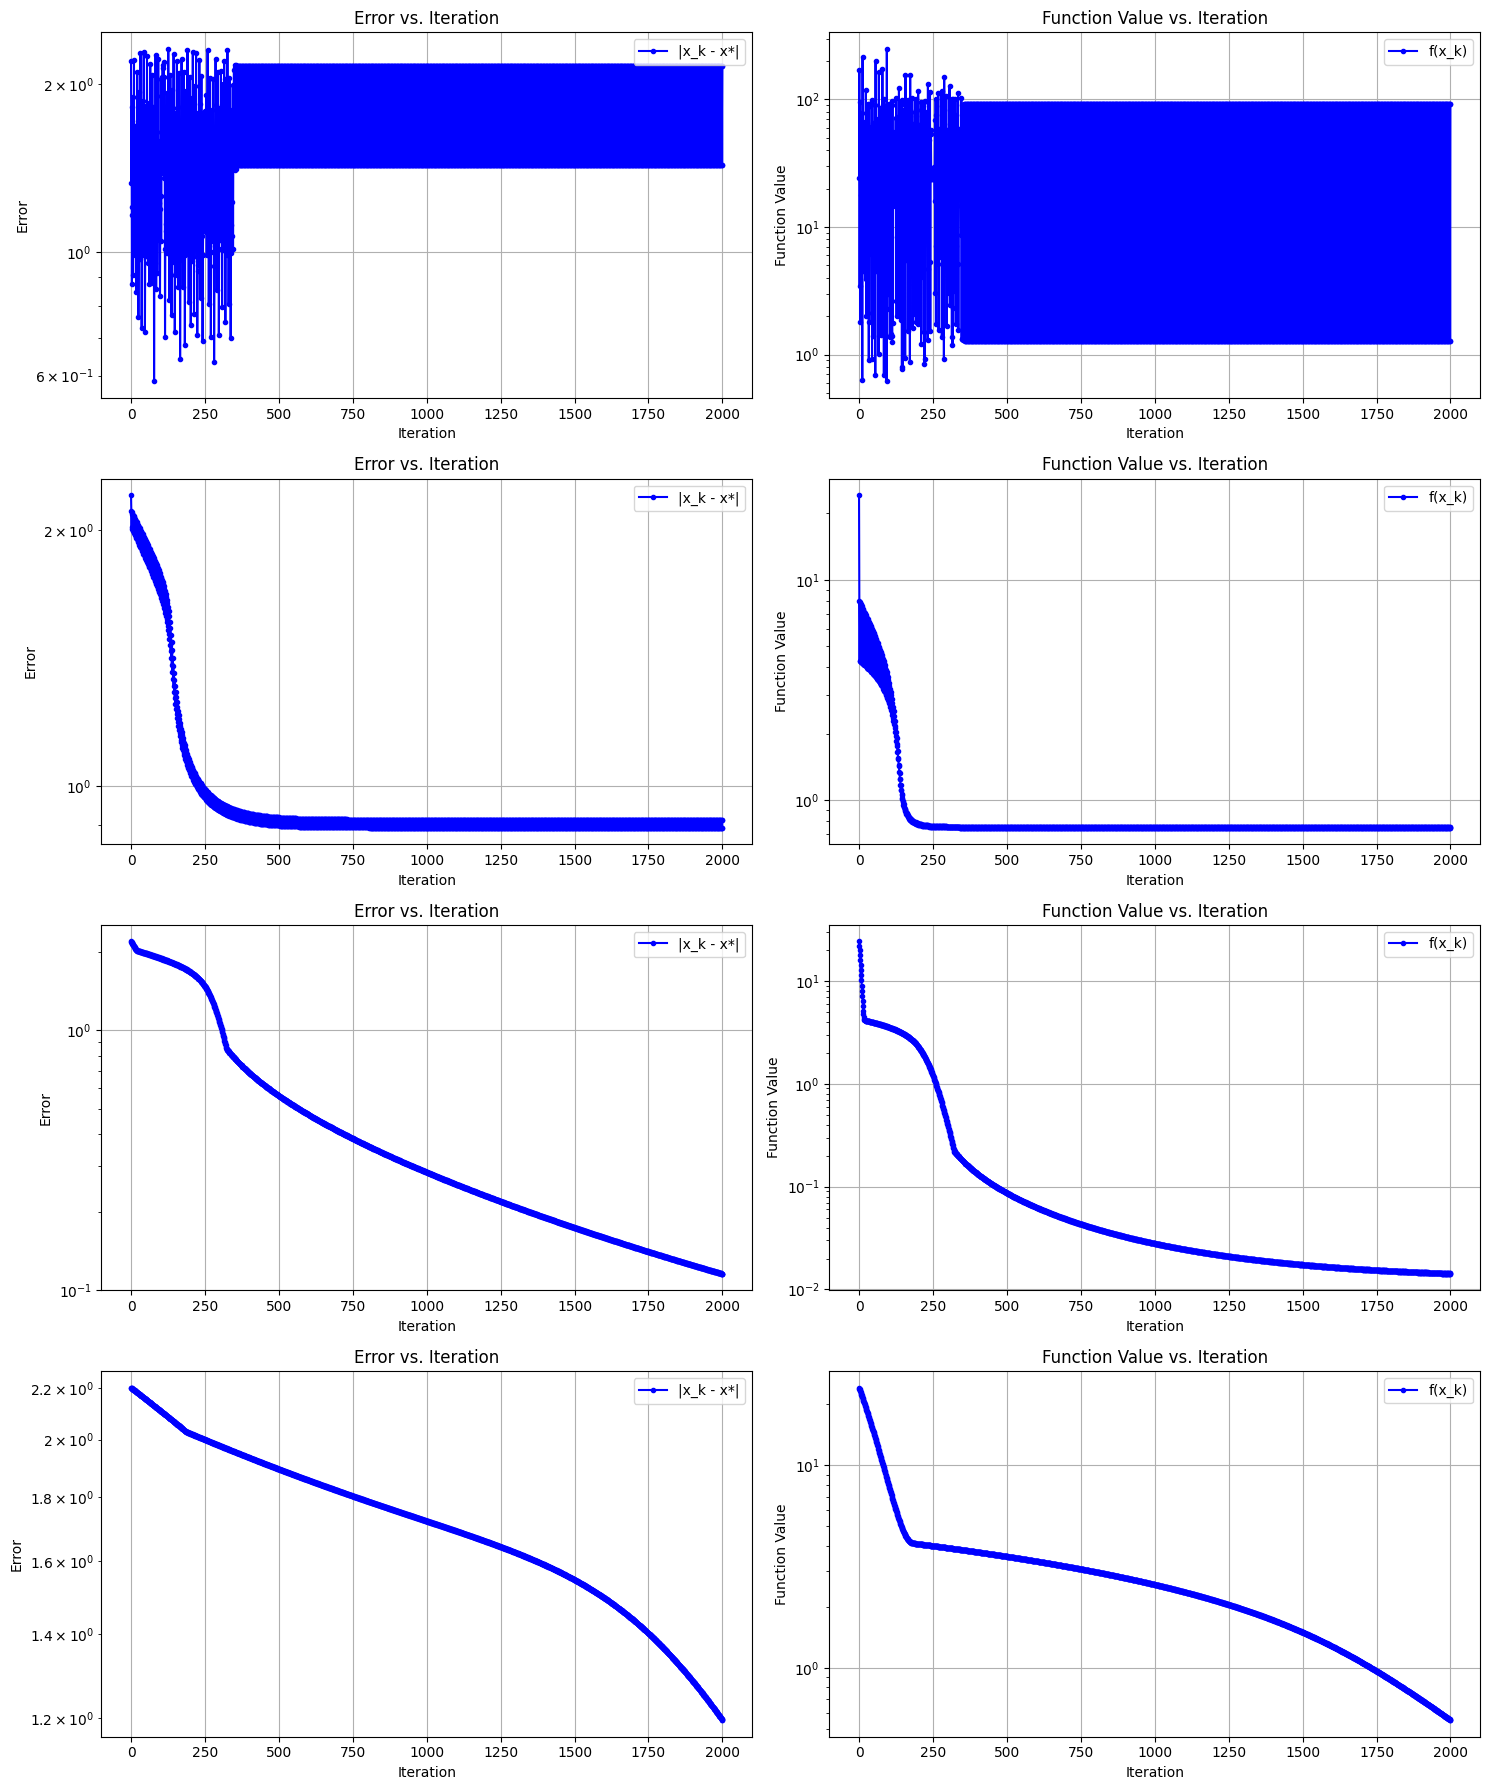

In [ ]:
# Define the alpha values to try
alpha_values = [1, 0.1, 0.01, 0.001]
x0 = [-1.2,1]
# Create subplots with 3 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(15, 18))

# Iterate through each alpha value
for i, alpha in enumerate(alpha_values):
    # Perform optimization for the current alpha
    x_optimized_steepest2, stats_steepest2 = steepestdescent(alpha, Myfun, x0, maxit=maxit)

    # Calculate error and error norm
    error_steepest2 = np.linalg.norm(x_min - np.array(stats_steepest2['X']), axis=1)

    # Plot error vs. iteration
    axs[i, 0].semilogy(error_steepest2, label='|x_k - x*|', color='blue', marker='.', linestyle='-')
    axs[i, 0].set_xlabel('Iteration')
    axs[i, 0].set_ylabel('Error')
    axs[i, 0].set_title('Error vs. Iteration')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Plot function value vs. iteration
    axs[i, 1].semilogy(stats_steepest2['F'], label='f(x_k)', color='blue', marker='.', linestyle='-')
    axs[i, 1].set_xlabel('Iteration')
    axs[i, 1].set_ylabel('Function Value')
    axs[i, 1].set_title('Function Value vs. Iteration')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    print(alpha, stats_steepest2['converged'], stats_steepest2['X'][-1], error_steepest2[-1])

plt.tight_layout()
plt.show()

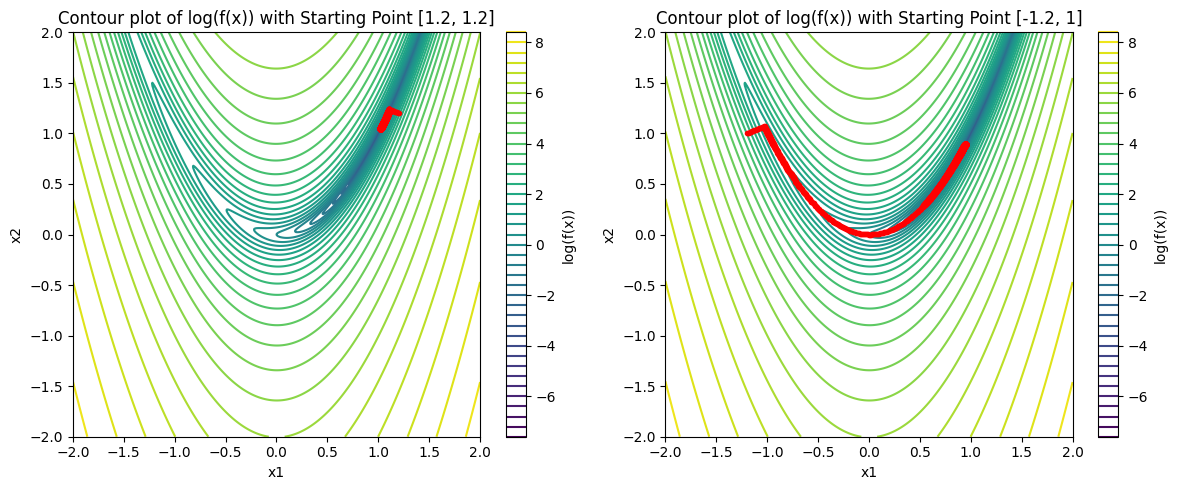

In [ ]:
x0_1 = [1.2,1.2]
x0_2 = [-1.2, 1]
alpha = 0.01  # Learning rate
maxit = 2000
stop_criteria = 1e-10

#Applying steepest
x_optimized_steepest1, stats_steepest1 = steepestdescent(alpha, Myfun, x0_1, tol=stop_criteria, maxit=maxit)
x_optimized_steepest2, stats_steepest2 = steepestdescent(alpha, Myfun, x0_2, tol=stop_criteria, maxit=maxit)

#Defining the points for plotting the contour plot.
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

#We plot the steepest descent with the best alpha value (alpha=0.01)
f_log = np.log(Myfun([X1, X2])[0])

#Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

contour_plot1 = axs[0].contour(X1, X2, f_log, levels=50, cmap='viridis')
fig.colorbar(contour_plot1, ax=axs[0], label='log(f(x))')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Contour plot of log(f(x)) with Starting Point [1.2, 1.2]')

contour_plot2 = axs[1].contour(X1, X2, f_log, levels=50, cmap='viridis')
fig.colorbar(contour_plot2, ax=axs[1], label='log(f(x))')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Contour plot of log(f(x)) with Starting Point [-1.2, 1]')

# Plot the minimizer at [1, 1]
iterates1 = np.array(stats_steepest1['X'])
iterates2 = np.array(stats_steepest2['X'])

# Plot the first and second components
axs[0].plot(iterates1[:, 0], iterates1[:, 1], 'r.-',  label='Starting point = [1.2,1.2]')
axs[1].plot(iterates2[:, 0], iterates2[:, 1], 'r.-',  label='Starting at [-1.2, 1]')

plt.tight_layout()

plt.show()

## 7b. Steepest descent line search

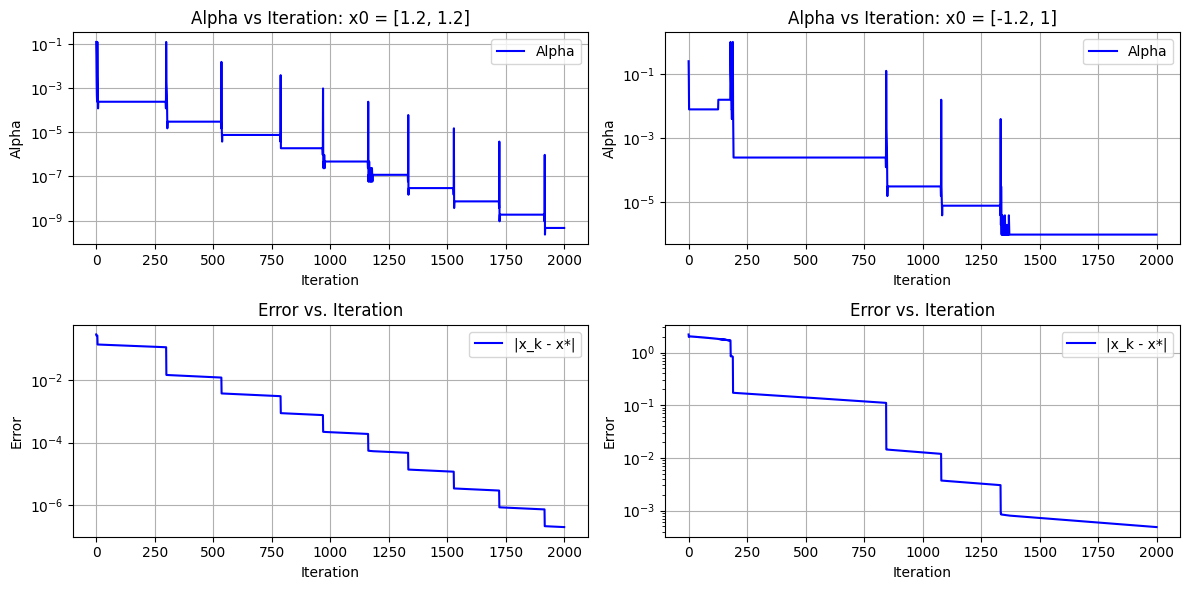

In [ ]:
# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
alpha = 1

# First subplot
x0 = [1.2, 1.2]
x_optimized_steepest_line1, stats_steepest_line1 = steepestdescent_line(Myfun, x0, maxit=maxit)
axs[0,0].semilogy(stats_steepest_line1['alpha'], label='Alpha', color='blue', linestyle='-')
axs[0,0].set_xlabel('Iteration')
axs[0,0].set_ylabel('Alpha')
axs[0,0].set_title('Alpha vs Iteration: x0 = [1.2, 1.2]')
axs[0,0].legend()
axs[0,0].grid(True)

#Error for plotting with other results
error_Steepest_line = np.linalg.norm(x_min - np.array(stats_steepest_line1['X']), axis=1)

# Second subplot
x0 = [-1.2, 1]
x_optimized_steepest_line2, stats_steepest_line2 = steepestdescent_line(Myfun, x0, maxit=maxit)
axs[0,1].semilogy(stats_steepest_line2['alpha'], label='Alpha', color='blue', linestyle='-')
axs[0,1].set_xlabel('Iteration')
axs[0,1].set_ylabel('Alpha')
axs[0,1].set_title('Alpha vs Iteration: x0 = [-1.2, 1]')
axs[0,1].legend()
axs[0,1].grid(True)

# Third subplot
error_steepest_line1 = np.linalg.norm(x_min - np.array(stats_steepest_line1['X']), axis=1)
axs[1,0].semilogy(error_steepest_line1, label='|x_k - x*|', color='blue', linestyle='-')
axs[1,0].set_xlabel('Iteration')
axs[1,0].set_ylabel('Error')
axs[1,0].set_title('Error vs. Iteration')
axs[1,0].legend()
axs[1,0].grid(True)

# Four subplot
error_steepest_line2 = np.linalg.norm(x_min - np.array(stats_steepest_line2['X']), axis=1)
axs[1,1].semilogy(error_steepest_line2, label='|x_k - x*|', color='blue', linestyle='-')
axs[1,1].set_xlabel('Iteration')
axs[1,1].set_ylabel('Error')
axs[1,1].set_title('Error vs. Iteration')
axs[1,1].legend()
axs[1,1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## 7c. Newton's method

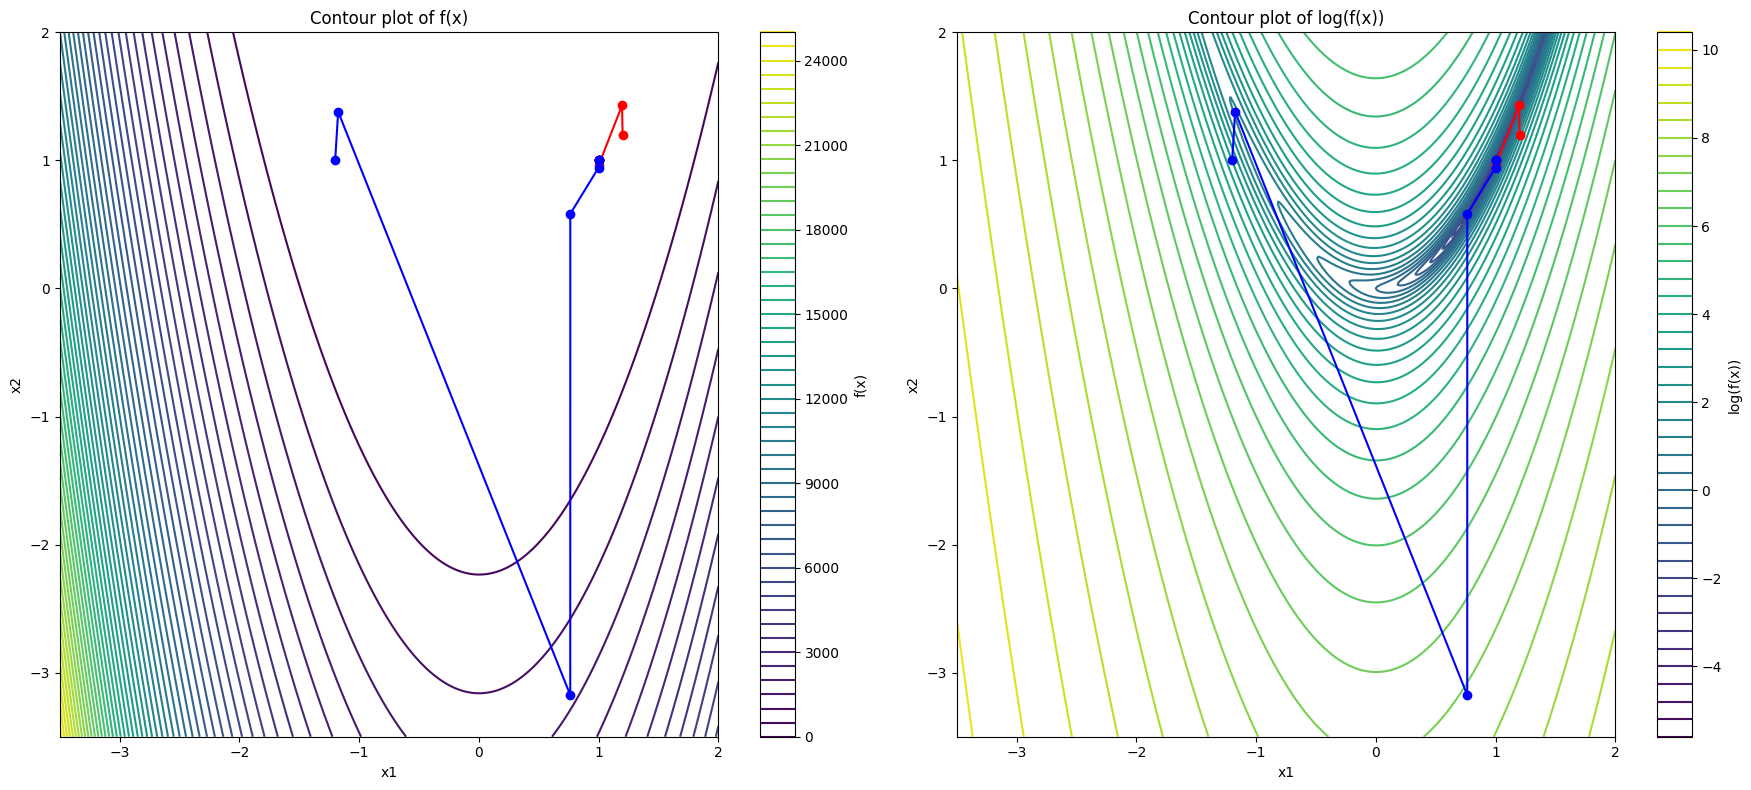

True 5
True 7


In [ ]:
x0_1 = [1.2, 1.2]
x0_2 = [-1.2, 1]
alpha = 1

# Apply Newton's method for each starting point
x_optimized_newton1, stats_newton1 = newton_md(alpha,Myfun, x0_1)
x_optimized_newton2, stats_newton2 = newton_md(alpha, Myfun, x0_2)

#Error for plotting with other results
error_Newton = np.linalg.norm(x_min - np.array(stats_newton1['X']), axis=1)

#Stats to np.array
iterates_1 = np.array(stats_newton1['X'])
iterates_2 = np.array(stats_newton2['X'])

# Plot the contour figure with iterates
x1 = np.linspace(-3.5, 2, 400)
x2 = np.linspace(-3.5, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate f(p1, p2) over the meshgrid
f = Myfun([X1,X2])[0]
f_log = np.log(Myfun([X1, X2])[0])

#Create subplots
fig, axs = plt.subplots(1,2, figsize=(18,8))

# Create a contour plot for f(x)
contour_plot1 = axs[0].contour(X1, X2, f, levels=50, cmap='viridis')
fig.colorbar(contour_plot1, ax=axs[0], label='f(x)')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Contour plot of f(x)')

axs[0].plot(iterates_1[:, 0], iterates_1[:, 1], 'ro-')  # Iterates for starting point [1.2, 1.2]
axs[0].plot(iterates_2[:, 0], iterates_2[:, 1], 'bo-')  # Iterates for starting point [-1.2, 1]

#Create a contour subplot for log(f(x))
contour_plot2 = axs[1].contour(X1, X2, f_log, levels=50, cmap='viridis')
fig.colorbar(contour_plot2, ax=axs[1], label='log(f(x))')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Contour plot of log(f(x))')

axs[1].plot(iterates_1[:, 0], iterates_1[:, 1], 'ro-')  # Iterates for starting point [1.2, 1.2]
axs[1].plot(iterates_2[:, 0], iterates_2[:, 1], 'bo-')  # Iterates for starting point [-1.2, 1]

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

print(stats_newton1['converged'],stats_newton1['iter'])
print(stats_newton2['converged'],stats_newton2['iter'])

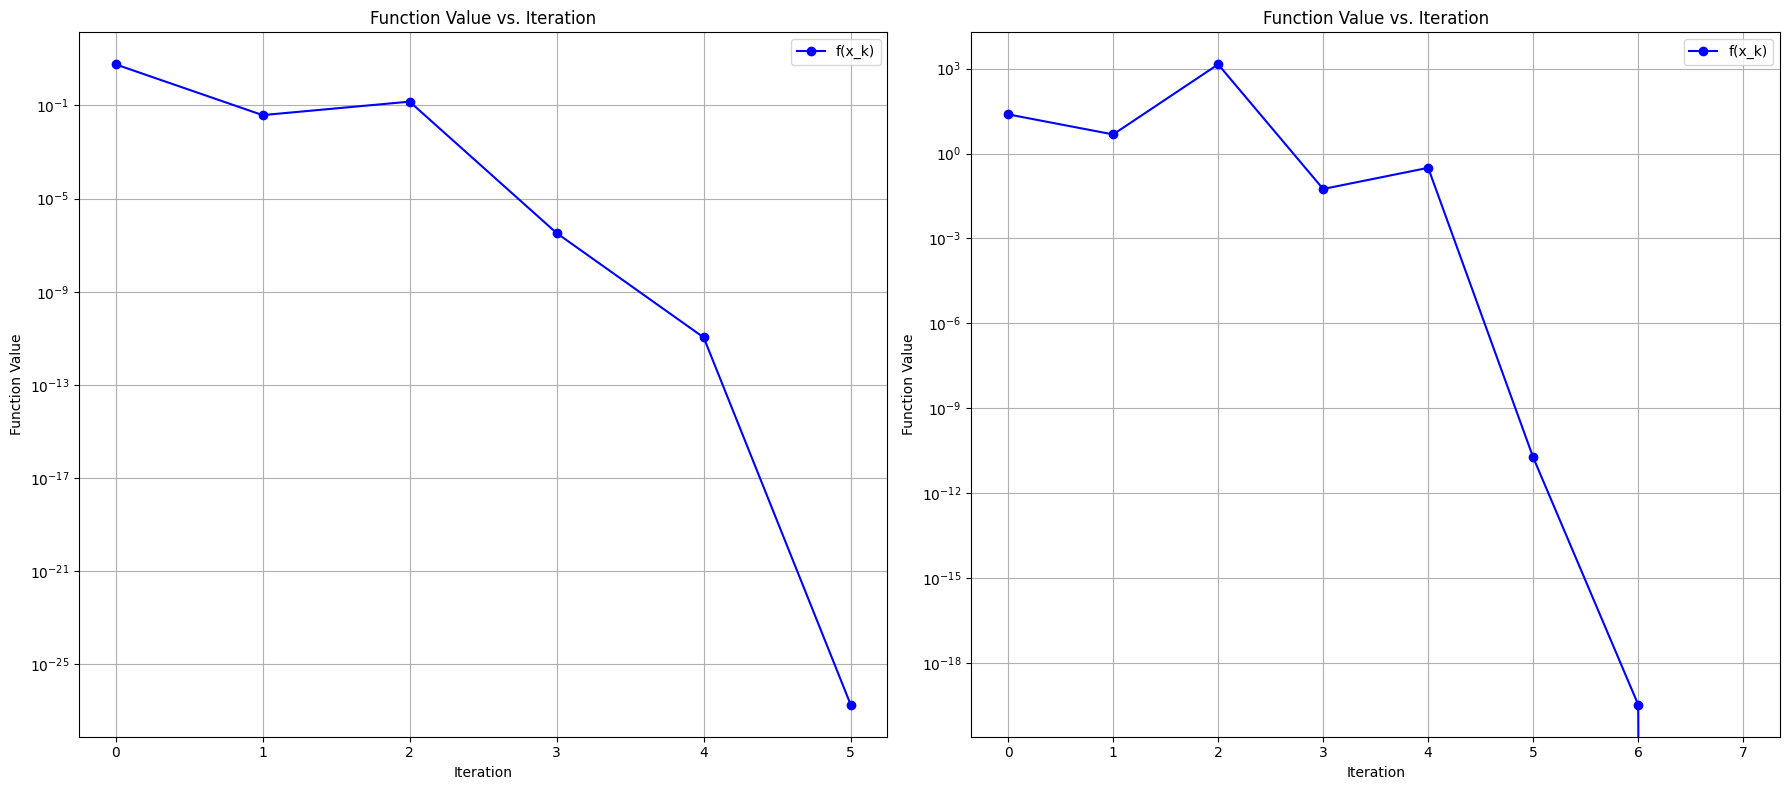

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(18,8))
axs[0].semilogy(stats_newton1['F'], label='f(x_k)', color='blue', marker='o', linestyle='-')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Function Value')
axs[0].set_title('Function Value vs. Iteration')
axs[0].legend()
axs[0].grid(True)

axs[1].semilogy(stats_newton2['F'], label='f(x_k)', color='blue', marker='o', linestyle='-')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Function Value')
axs[1].set_title('Function Value vs. Iteration')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

plt.show()

## 7d. BFGS

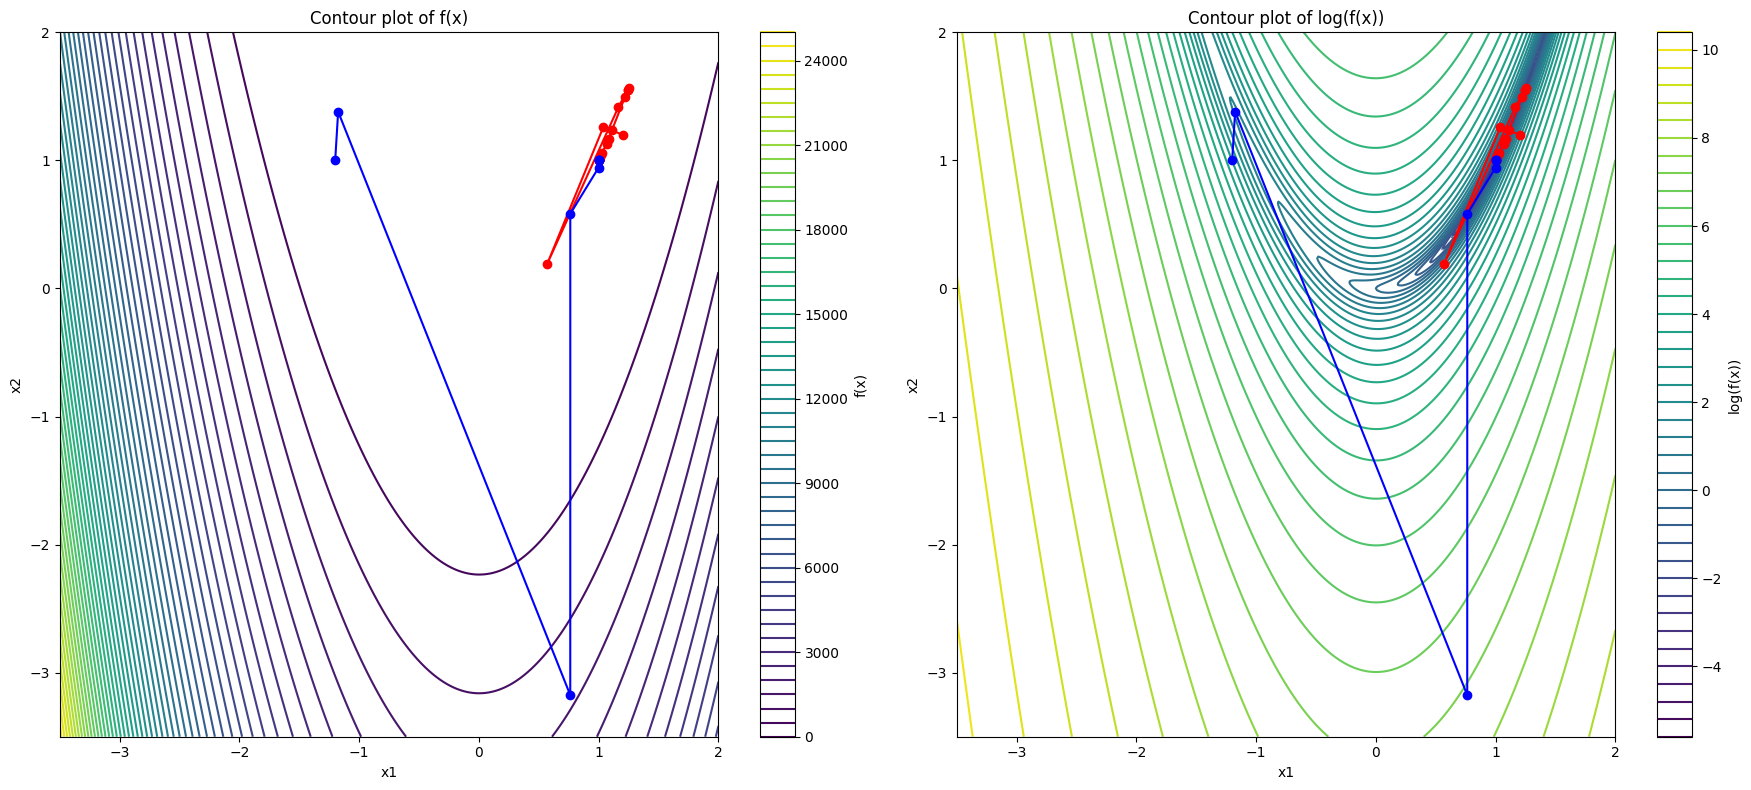

In [ ]:
maxit = 2000
x0 = [1.2, 1.2]
H = Myfun(x0)[2]

x_optimized_BFGS1, stats_BFGS1 = BFGSmethod_line(H, maxit ,Myfun, x0)

#Error for plotting with other results
error_BFGS = np.linalg.norm(x_min - np.array(stats_BFGS1['X']), axis=1)

#Stats to np.array
iterates_1 = np.array(stats_BFGS1['X'])
iterates_2 = np.array(stats_newton2['X'])

# Plot the contour figure with iterates
x1 = np.linspace(-3.5, 2, 400)
x2 = np.linspace(-3.5, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate f(p1, p2) over the meshgrid
f = Myfun([X1,X2])[0]
f_log = np.log(Myfun([X1, X2])[0])

#Create subplots
fig, axs = plt.subplots(1,2, figsize=(18,8))

# Create a contour plot for f(x)
contour_plot1 = axs[0].contour(X1, X2, f, levels=50, cmap='viridis')
fig.colorbar(contour_plot1, ax=axs[0], label='f(x)')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Contour plot of f(x)')

axs[0].plot(iterates_1[:, 0], iterates_1[:, 1], 'ro-')  # Iterates for starting point [1.2, 1.2]
axs[0].plot(iterates_2[:, 0], iterates_2[:, 1], 'bo-')  # Iterates for starting point [-1.2, 1]

#Create a contour subplot for log(f(x))
contour_plot2 = axs[1].contour(X1, X2, f_log, levels=50, cmap='viridis')
fig.colorbar(contour_plot2, ax=axs[1], label='log(f(x))')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Contour plot of log(f(x))')

axs[1].plot(iterates_1[:, 0], iterates_1[:, 1], 'ro-')  # Iterates for starting point [1.2, 1.2]
axs[1].plot(iterates_2[:, 0], iterates_2[:, 1], 'bo-')  # Iterates for starting point [-1.2, 1]

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## 7e. Plots of different methods


### 7e1. Plots of ek

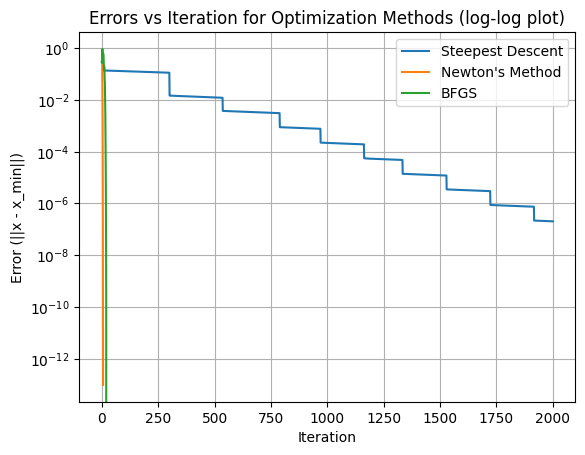

In [ ]:
# Plot the errors as functions of iteration number using log-log scale
plt.plot(error_Steepest_line, label='Steepest Descent')
plt.plot(error_Newton, label='Newton\'s Method')
plt.plot(error_BFGS, label='BFGS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error (||x - x_min||)')
plt.title('Errors vs Iteration for Optimization Methods (log-log plot)')
plt.legend()
plt.grid(True)
plt.show()

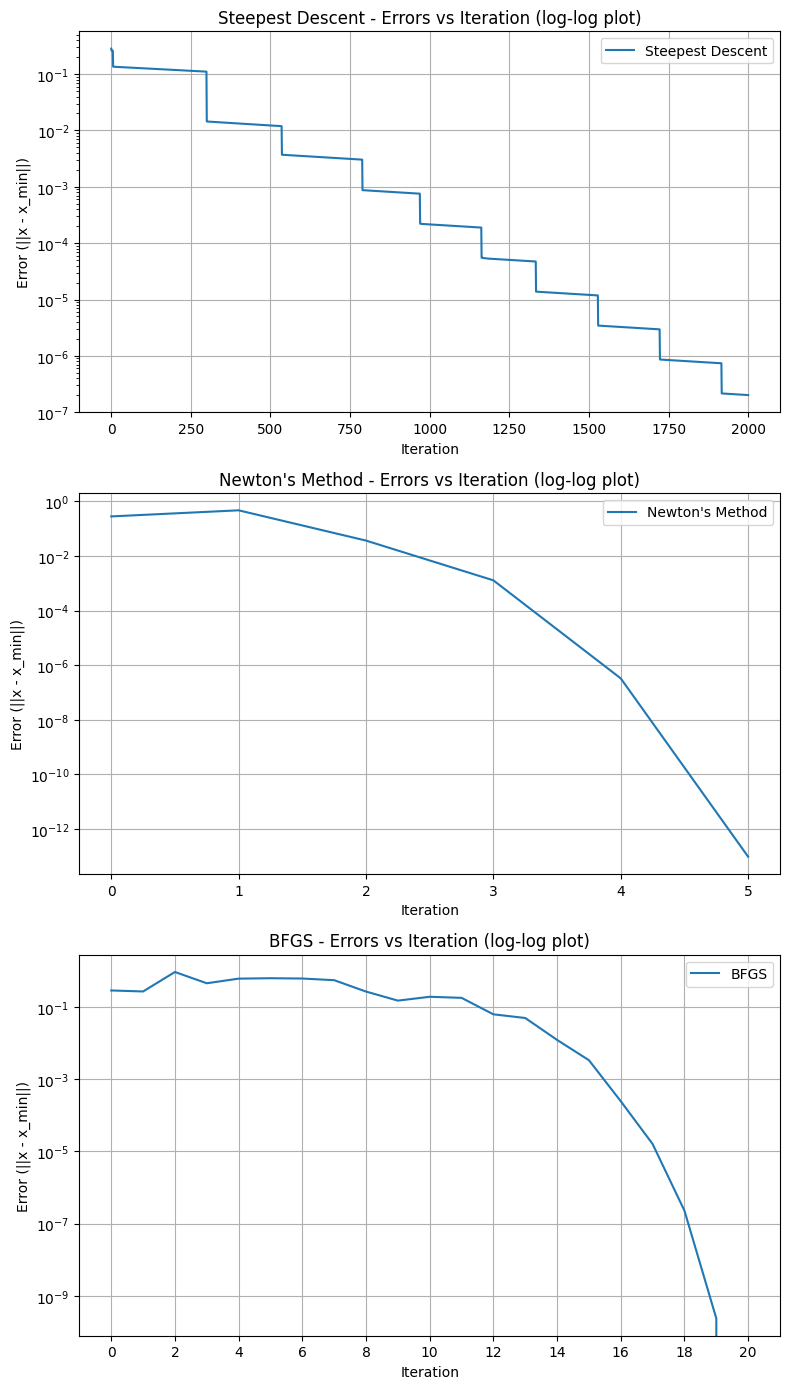

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 14))
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot for Steepest Descent
axes[0].plot(error_Steepest_line, label='Steepest Descent')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Error (||x - x_min||)')
axes[0].set_title('Steepest Descent - Errors vs Iteration (log-log plot)')
#axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid(True)

# Plot for Newton's Method
axes[1].plot(error_Newton, label="Newton's Method")
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Error (||x - x_min||)')
axes[1].set_title("Newton's Method - Errors vs Iteration (log-log plot)")
#axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True)

# Plot for BFGS
axes[2].plot(error_BFGS, label='BFGS')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Error (||x - x_min||)')
axes[2].set_title('BFGS - Errors vs Iteration (log-log plot)')
#axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].legend()
axes[2].grid(True)
axes[2].set_xticks(np.arange(0, len(error_BFGS), 2 ))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 7e2. Plots of f(xk)

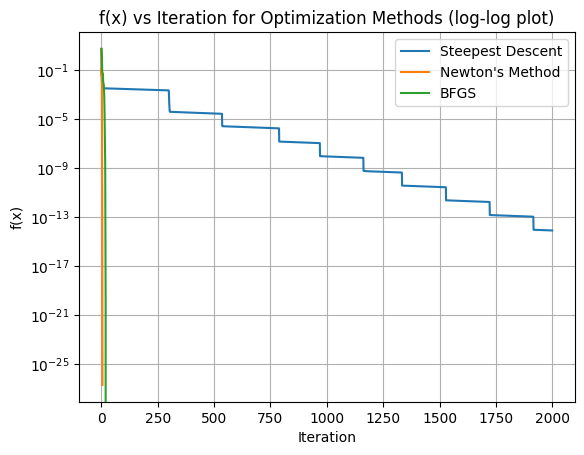

In [ ]:
# Plot the errors as functions of iteration number using log-log scale
plt.plot(stats_steepest_line1['F'], label='Steepest Descent')
plt.plot(stats_newton1['F'], label='Newton\'s Method')
plt.plot(stats_BFGS1['F'], label='BFGS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('f(x) vs Iteration for Optimization Methods (log-log plot)')
plt.legend()
plt.grid(True)
plt.show()

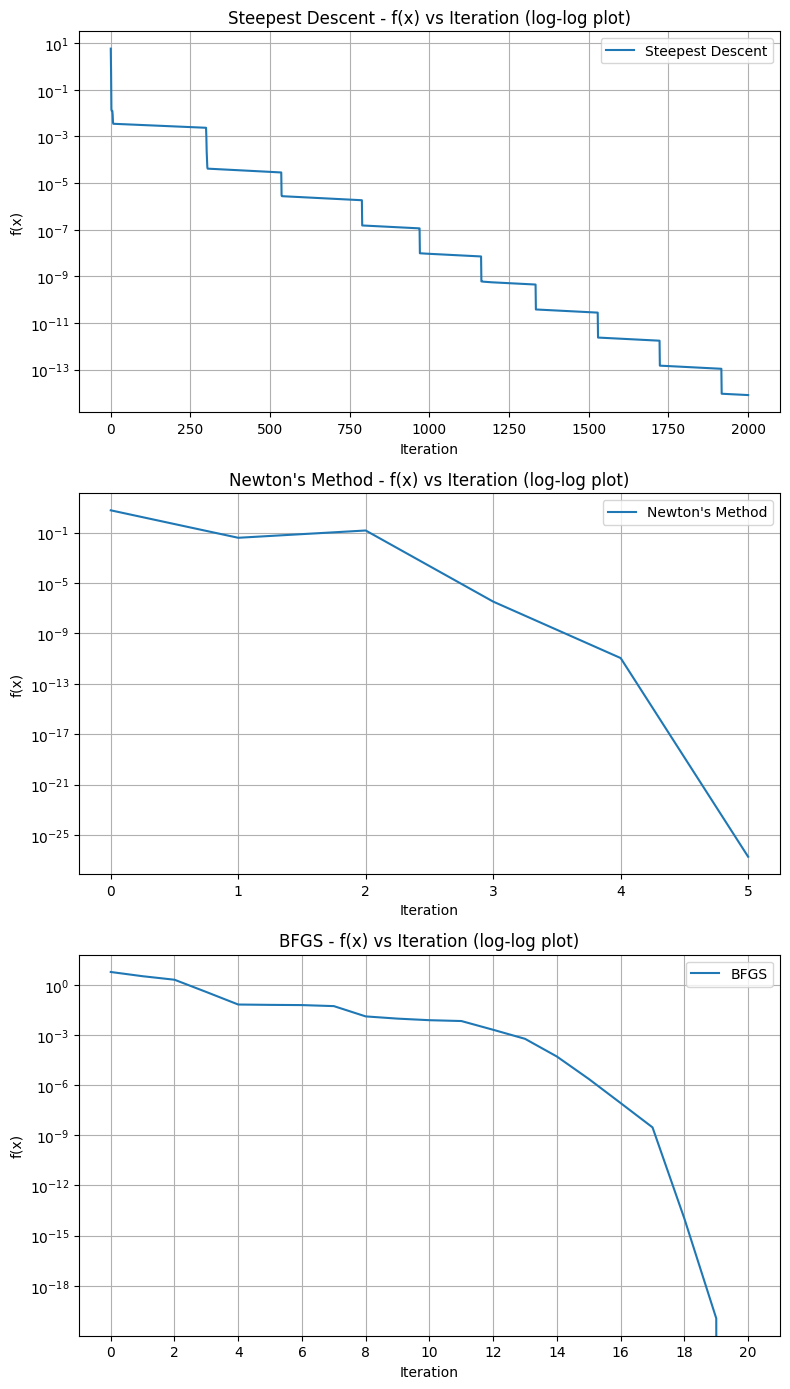

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 14))
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot for Steepest Descent
axes[0].plot(stats_steepest_line1['F'], label='Steepest Descent')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('f(x)')
axes[0].set_title('Steepest Descent - f(x) vs Iteration (log-log plot)')
#axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid(True)

# Plot for Newton's Method
axes[1].plot(stats_newton1['F'], label="Newton's Method")
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('f(x)')
axes[1].set_title("Newton's Method - f(x) vs Iteration (log-log plot)")
#axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True)

# Plot for BFGS
axes[2].plot(stats_BFGS1['F'], label='BFGS')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('f(x)')
axes[2].set_title('BFGS - f(x) vs Iteration (log-log plot)')
#axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].legend()
axes[2].grid(True)
axes[2].set_xticks(np.arange(0, len(stats_BFGS1['F']), 2 ))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()